## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

## Recognize and represent data graphically

In [4]:
data = pd.read_csv('/kaggle/input/boston-housing-dataset/Boston.csv')
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [9]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


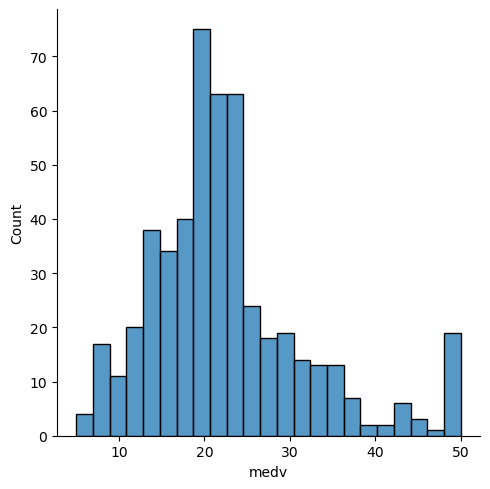

In [13]:
sns.displot(x=data['medv']);

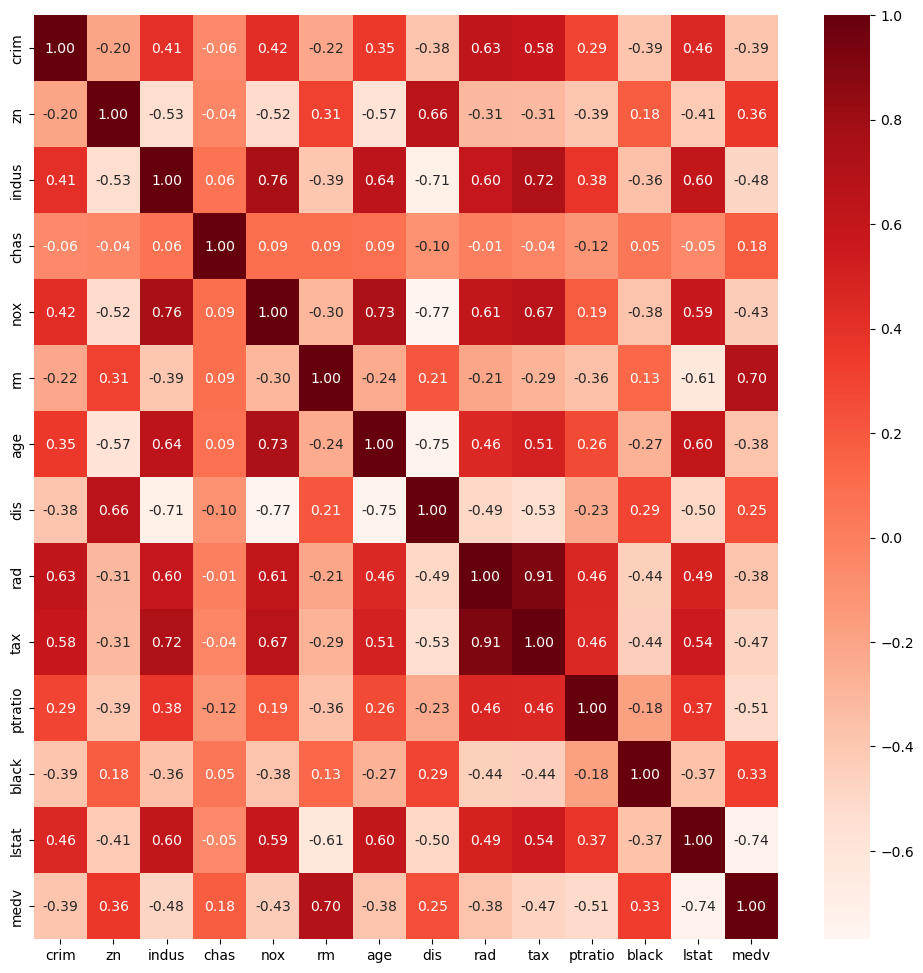

In [16]:
plt.figure(figsize=(12,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f');

### Splitting data for modeling

In [81]:
X = data.drop(columns=['medv'])
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle =True)

### ML Models

**Random Forest Regressor Model**

In [85]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=7, random_state=0)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9660216413167757
Random Forest Regressor Test Score is :  0.9016815948465721


In [97]:
y_pred_rf = RandomForestRegressorModel.predict(X_test)
MSEValue_RF = mean_squared_error(y_test, y_pred_rf, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', np.sqrt(MSEValue_RF))

Mean Absolute Error Value is :  3.0018865729744784


**Gradient Boosting Regressor**

In [95]:
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=4,learning_rate = 0.05,random_state=0)
GBRModel.fit(X_train, y_train)

print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.9843405667772539
GBRModel Test Score is :  0.913998457543389


In [99]:
y_pred_gbr = GBRModel.predict(X_test)
MSEValue_GB = mean_squared_error(y_test, y_pred_gbr, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', np.sqrt(MSEValue_GB))

Mean Absolute Error Value is :  2.8075660747032116


**XGB Regressor**

In [113]:
XGBModel = XGBRegressor(n_estimators=100, max_depth=3, eta=0.09, subsample=0.7, colsample_bytree=0.7)
XGBModel.fit(X_train, y_train)

print('XGBoost Regressor Train Score is : ' , XGBModel.score(X_train, y_train))
print('XGBoost Regressor Test Score is : ' , XGBModel.score(X_test, y_test))

XGBoost Regressor Train Score is :  0.9706096670819414
XGBoost Regressor Test Score is :  0.9146326905881368


In [114]:
y_pred_x = XGBModel.predict(X_test)
MSEValue_X = mean_squared_error(y_test, y_pred_x, multioutput='uniform_average')
print('Mean Squared Error Value by Square root is : ', np.sqrt(MSEValue_X))

Mean Squared Error Value by Square root is :  2.7971944800826836
